In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
lr = 1e-04
train_iter = 10
dropout = 0.5
bat_size = 50 
val_size = 2000
img_idx = 10
 

In [ ]:
df = pd.read_csv('/content/mnist_train.csv')

In [ ]:
df.head()
df.shape

(60000, 785)

In [ ]:

# IMAGE DATA
image = df.iloc[:,1:].values
image.astype(np.float)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
image.shape

(60000, 784)

In [ ]:
type(image)

numpy.ndarray

In [ ]:
image = np.multiply(image,1.0/255.0)

In [ ]:
img_wid = img_dep = np.ceil(np.sqrt(image.shape[1])).astype(np.uint)

In [ ]:
img_wid

28

In [ ]:
img_dep

28

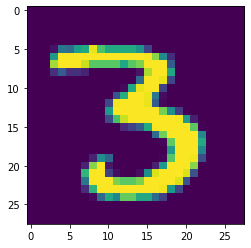

In [ ]:
# Display Image
img_idx = 12
def disp_img(img):
  img_re = img.reshape((img_dep,img_wid))
  plt.imshow(img_re)
disp_img(image[img_idx])

In [ ]:
# Create Label or output column 
label_flat = df['label'].values.ravel()

In [ ]:
label_flat[1:50]

array([0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9,
       1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3,
       9, 8, 5, 9, 3])

In [ ]:
label_flat.shape

(60000,)

In [ ]:
label_count = np.unique(label_flat)
numclass = len(label_count)

In [ ]:
# One Hot Encoding for the nominal category
def dense_to_one_hot(label_flat,numclass):
  count = label_flat.shape[0]
  idx_offset = np.arange(count)* numclass
  labels_ohe = np.zeros((count,numclass))
  labels_ohe.flat[idx_offset + label_flat.ravel()] = 1
  return labels_ohe

In [ ]:
labels = dense_to_one_hot(label_flat,numclass)

In [ ]:
labels.shape

(60000, 10)

In [ ]:
# Split training data into training and validation

In [ ]:
val_img = image[:val_size]
val_lab = labels[:val_size]

In [ ]:
train_img = image[val_size:]
train_lab = labels[:val_size]

In [ ]:
# CNN Begins
# Weight Initialisation
def wt_init(shape):
  initial = tf.truncated_normal(shape,stddev=0.1)
  return tf.Variable(initial)

In [ ]:
def bias_var(shape):
  initial = tf.constant(0.1,shape=shape)
  return tf.Variable(initial)

In [ ]:
def conv2d(x,w):
  return tf.nn.conv2d(x,w,strides=[1,1,1,1],padding='SAME')
# stride = 1 : convolve one image at a time and not all, [1,1] : stride size square , 1 : convolve each channel at a time R,G, B, 
# padding = same means output or convolved image should have size as input so accordingly padding is done.


In [ ]:
def max_pool(x):
  return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


In [ ]:
import tensorflow as tf

In [ ]:
x = tf.placeholder('float',shape = [None,image.shape[1]])
y = tf.placeholder('float',shape = [None,numclass])
W_conv1 = wt_init([5,5,1,32])
b_conv1 = bias_var([32]) 

In [ ]:
img = tf.reshape(x,[-1,img_wid,img_dep,1])

In [ ]:
img.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'Reshape:0' shape=(?, 28, 28, 1) dtype=float32>>

In [ ]:
W_conv1.shape

TensorShape([Dimension(5), Dimension(5), Dimension(1), Dimension(32)])

In [ ]:
h_conv1 = tf.nn.relu(conv2d(img,W_conv1) + b_conv1)

In [ ]:
h_conv1.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'Relu:0' shape=(?, 28, 28, 32) dtype=float32>>

In [ ]:
h_pool1 = max_pool(h_conv1)

In [ ]:
h_pool1.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>>

In [ ]:
# 2nd Convolution layer and subsequent layers 
# Here we are going to depth of 64 instead of 32
img = tf.reshape(x,[-1,img_wid,img_dep,32])
W_conv2 = wt_init([5,5,32,64])
b_conv2 = bias_var([64]) 
h_conv2 = tf.nn.relu(conv2d(img,W_conv2) + b_conv2)
h_pool2 = max_pool(h_conv2)

In [ ]:
h_conv2.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'Relu_1:0' shape=(?, 28, 28, 64) dtype=float32>>

In [ ]:
h_pool2.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'MaxPool_1:0' shape=(?, 14, 14, 64) dtype=float32>>

In [ ]:
 # Bias is added only to scale the entire matrix so it is defined for each dimension or channel ( last dim.)
# So if we have 5x5x1x32 input filter, it means we will have bias wrt to each of last dimension or 32 bias. For each 5x5x1 we have same bias.

In [ ]:
# Dense Layer
W_fc1 = wt_init([14*14*64,1024])
b_fc1 = bias_var([1024])
h_pool2_flat = tf.reshape(h_pool2,[-1,14*14*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1) + b_fc1)


In [ ]:
h_fc1.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'Relu_2:0' shape=(?, 1024) dtype=float32>>

In [ ]:
# Dropout - to remove complexity from the system 
keep_prob = tf.placeholder('float')
h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)


In [ ]:
# Final Layer
W_fc2 = wt_init([1024,numclass])
b_fc2 = bias_var([numclass])
y = tf.nn.softmax(tf.matmul(h_fc1_drop,W_fc2) + b_fc2)

In [ ]:
# Log-loss cost function 
cross_entropy = tf.reduce_sum(y*tf.log(y))

In [ ]:
# Optimisation Function
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

In [ ]:
# Tensorflow Session Initiate
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
